<h1><center>Natural Computing, Experimenting with Genetic Programming</center></h1>
<center>Frederik Kelbel, s1653529</center>

## Set-up

I decided against seeding since the results could heavily depend on a good seed, depending on the parameters. It also has negative repurcussions on diversity, if the seed is kept the same during the evolution process. One could make the seed an inheritable trait/gene. The experiments do not cover this.

In [1]:
from Callables import find_prime_polynomial
from Chromosomes import Fitness, Poly_Chrom, Tree_Chrom
from Population import Poly_Population, Tree_Population, Tree_SimAnnealing_Population
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_final_polynomials(pop, test_interval):
    print("Surviving polynomial: ")
    p = pop.polynomials[0]
    print(p.print_gp_polynomial())
    print("On test interval {0} the polynomial produced {1} primes. \nIt had a maximum of {2} "
          "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
          "\nIts fitness score is {5}.\n"
          .format(test_interval, p.num_primes_fitness_in_interval(test_interval),
                  p.num_consecutive_primes_fitness_in_interval(test_interval),
                  test_interval[0],
                  p.num_consecutive_primes_fitness(test_interval),
                  p.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                   Fitness.number_of_primes_in_interval,
                                                   Fitness.number_of_consecutive_primes])))

def show_average_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    fig.savefig(save_as)
    plt.show()
    
def show_average_fitness_comparison(pops, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    for pop in pops:
        ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time, label=str(type(pop).__name__))
    ax.legend(loc='best')
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Fitness')
    for i in range(len(pop.fitness_over_time)):
        plt.scatter(np.tile([i], len(pop.fitness_over_time[i])), pop.fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness_comparison(pops, save_as):
    num_plots = len(pops)
    fig, axs = plt.subplots(num_plots, figsize=(8, 10))
    fig.suptitle('Fitness comparison')
    for k in range(num_plots):
            for i in range(len(pops[k].fitness_over_time)):
                axs[k].set_ylabel('Fitness')
                axs[k].set_xlabel('Generations')
                axs[k].scatter(np.tile([i], len(pops[k].fitness_over_time[i])), pops[k].fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()

## Poly-Population

<h3>Baseline</h3>
This serves as a reference for comparisons and reproduction. The test interval is the input interval. Hence, in theory we could produce up to 200 primes on our test interval.

In [3]:
test_interval=(0, 200)
baseline1 = Poly_Chrom(np.array([17, 1, 1]))
baseline2 = Poly_Chrom(np.array([41, 1, 1]))
print("x^2 + x^1 + 17: ")
print("On test interval {0} the first baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline1.num_primes_fitness_in_interval(test_interval),
              baseline1.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline1.num_consecutive_primes_fitness(test_interval),
              baseline1.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("x^2 + x^1 + 41: ")
print("On test interval {0} the second baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline2.num_primes_fitness_in_interval(test_interval),
              baseline2.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline2.num_consecutive_primes_fitness(test_interval),
              baseline2.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))

x^2 + x^1 + 17: 
On test interval (0, 200) the first baseline produced 105 primes. 
It had a maximum of 16 consecutive primes on the test interval. 
Starting at 0, it had 16 consecutive primes. 
Its fitness score is 137.

x^2 + x^1 + 41: 
On test interval (0, 200) the second baseline produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



<h3>Attempt to reproduce the second baseline with a GA. Establishing baseline parameters.</h3>

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
(1.0)x^2 + (1.0)x^1 + (41.0)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



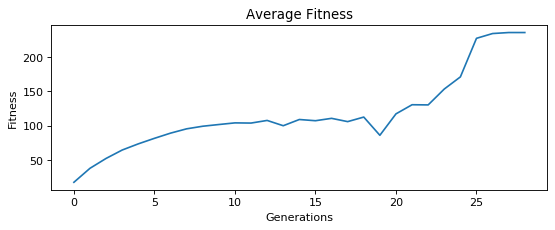

In [4]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
poly_pop_order_2 = find_prime_polynomial(Poly_Population, 
                                   [Fitness.number_of_consecutive_primes_in_interval,
                                    Fitness.number_of_primes_in_interval,
                                    Fitness.number_of_consecutive_primes],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                        constraint=constraint)
show_final_polynomials(poly_pop_order_2, test_interval)
show_average_fitness(poly_pop_order_2, "reproduction_ga.pdf")

## Tree-Population

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
add(add(add(x, 33), add(add(x, 10), x)), multiply(x, x))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 39 consecutive primes on the test interval. 
Starting at 0, it had 39 consecutive primes. 
Its fitness score is 234.



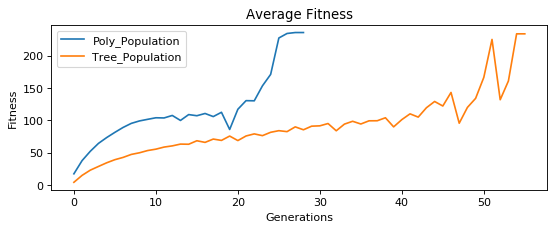

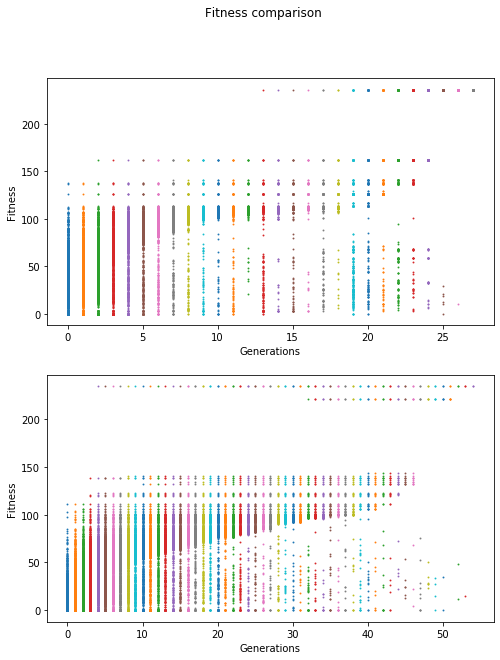

In [6]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
tree_pop_depth_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_depth_2, test_interval)
show_average_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_ga_comparison.pdf")
show_scatter_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_ga_2_comparison.pdf")

### Increasing search space

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(add(x, multiply(x, add(13, x))), add(x, -53))
On test interval (0, 200) the polynomial produced 128 primes. 
It had a maximum of 17 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 145.



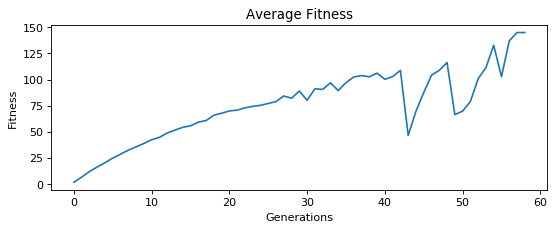

In [7]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_1 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_1, test_interval)
show_average_fitness(tree_pop_custom_1, "custom_tree_1.pdf")

### Introducing multiple populations

Chromosome: Tree_Population, Amount of populations: 3, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(add(-364, x), add(add(add(43, 1300), add(multiply(17, x), add(-7, 11))), multiply(add(add(-52, x), x), add(add(x, x), 25))))
On test interval (0, 200) the polynomial produced 138 primes. 
It had a maximum of 17 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 155.



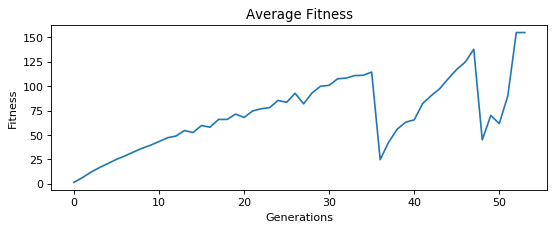

In [8]:
num_populations=3
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_2, test_interval)
show_average_fitness(tree_pop_custom_2, "custom_tree_2.pdf")

### High vs low mutation

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.6, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(multiply(multiply(add(multiply(x, -18), add(30, x)), multiply(multiply(0, 4), multiply(52, 47))), add(add(add(add(add(add(multiply(x, 34), add(-10, 26)), add(add(x, x), add(x, x))), multiply(add(add(x, x), multiply(x, x)), add(multiply(-29, x), add(58, -31)))), add(add(add(multiply(x, x), add(x, x)), add(add(x, x), multiply(-29, 44))), multiply(add(multiply(33, x), add(29, x)), multiply(multiply(-49, 48), multiply(x, 32))))), multiply(x, x)), multiply(add(x, -23), multiply(10, x)))), add(add(x, x), add(add(add(x, x), multiply(10, x)), add(multiply(x, 16), add(8, -61)))))
On test interval (0, 200) the polynomial produced 98 primes. 
It had a maximum of 6 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 104.

Chromosome: Tre

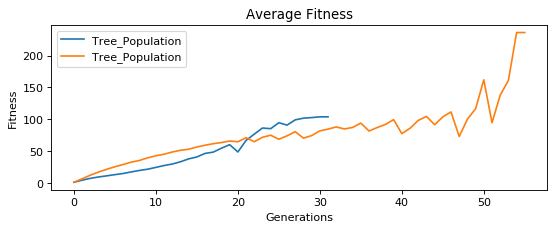

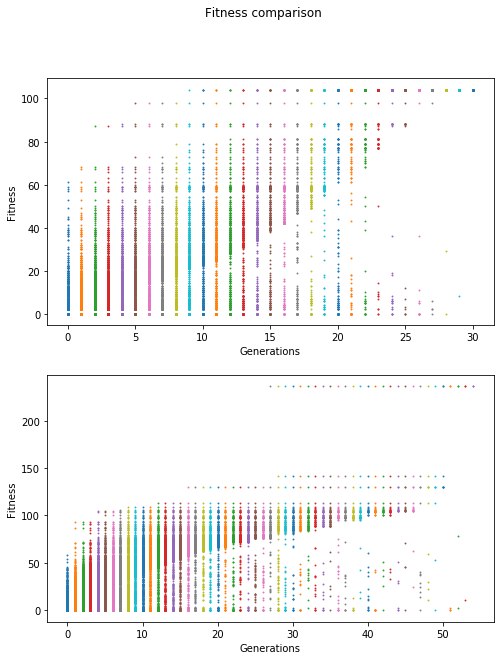

In [9]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.6
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_3 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_3, test_interval)
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.01
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_4 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_4, test_interval)
show_average_fitness_comparison([tree_pop_custom_3, tree_pop_custom_4], "tree_mutation_comparison.pdf")
show_scatter_fitness_comparison([tree_pop_custom_3, tree_pop_custom_4], "tree_mutation_2_comparison.pdf")

### Tree-Population, Experimenting with different functions

I will introduce some custom functions to use in the Tree_Population.

In [10]:
def add(x, y):
    return np.add(x, y)


def multiply(x, y):
    return np.multiply(x, y)

def maximum(x, y):
    return np.maximum(x, y)

def minimum(x, y):
    return np.maximum(x, y)

def mod(x, y): # Will return warning whenever y is equivalent to 0. It then returns 0
    return np.mod(x, y)


Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
maximum(maximum(mod(minimum(13, x), multiply(add(27, x), 55)), -49), maximum(add(multiply(add(x, x), x), add(-48, add(multiply(54, x), add(-48, -1)))), minimum(add(minimum(x, x), add(-48, -1)), mod(multiply(x, 55), minimum(x, 10)))))
On test interval (0, 200) the polynomial produced 109 primes. 
It had a maximum of 6 consecutive primes on the test interval. 
Starting at 0, it had 1 consecutive primes. 
Its fitness score is 116.



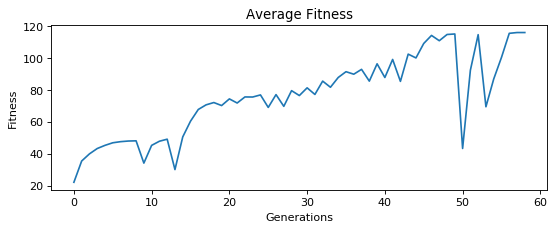

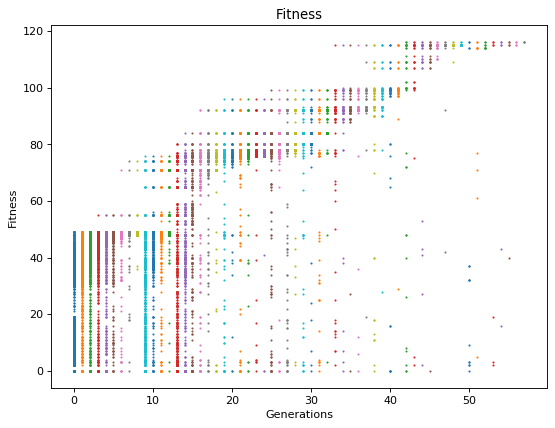

In [13]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
operator_functions=[maximum, minimum, mod]
tree_pop_exp_custom = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom, test_interval)
show_average_fitness(tree_pop_exp_custom, "function_exp_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom, "function_exp_2_tree.pdf")

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
minimum(maximum(multiply(multiply(x, 35), add(add(add(add(-12, 41), add(x, x)), multiply(multiply(-37, 14), multiply(x, x))), add(multiply(add(x, 17), multiply(x, -50)), add(multiply(x, -42), multiply(x, x))))), maximum(maximum(maximum(x, x), maximum(11, x)), add(add(41, x), multiply(x, x)))), 21)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



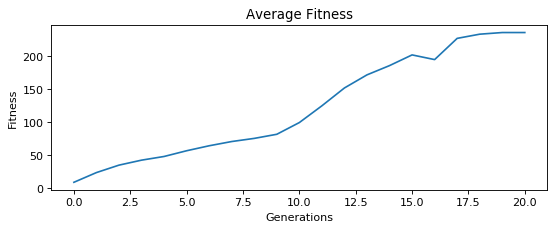

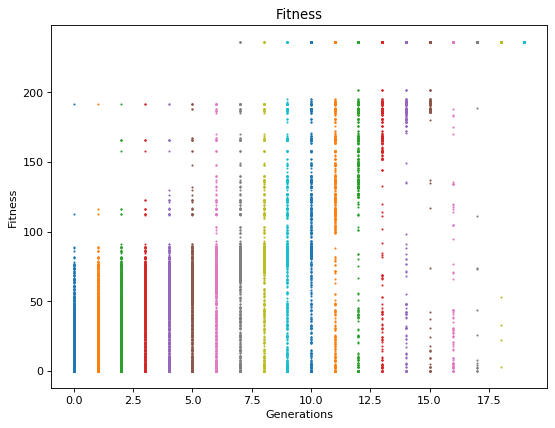

In [12]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
operator_functions=[add, multiply, maximum, minimum, mod]
tree_pop_exp_custom_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom_2, test_interval)
show_average_fitness(tree_pop_exp_custom_2, "function_exp_2.1_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom_2, "function_exp_2.2_tree.pdf")

### What happens if we integrate Simulated Annealing to the initialisation process?

In [15]:
import copy
import math
from Chromosomes import Tree_Terminal

def simulated_annealing(original_polynomial, max_iterations=1000, max_temp=100000, temp_change=0.98):
    if isinstance(original_polynomial, Tree_Chrom):
        current_polynomial = copy.deepcopy(original_polynomial)
        best_polynomial = original_polynomial
        i_polynomial = copy.deepcopy(current_polynomial)
        terminals = i_polynomial.return_terminals()
        for _ in range(max_iterations):
            terminals = np.array([t.go_to_neighbour(50) for t in terminals])
            max_temp = max_temp * temp_change
            i_cost = annealing_cost(i_polynomial)
            current_cost = annealing_cost(current_polynomial)
            prob = math.exp((current_cost-i_cost)/max_temp)
            if i_cost <= current_cost:
                current_polynomial = copy.deepcopy(i_polynomial)
                if i_cost <= annealing_cost(best_polynomial):
                    best_polynomial = copy.deepcopy(i_polynomial)
            elif np.random.choice([True, False], p=[prob, 1-prob]):
                current_polynomial = copy.deepcopy(i_polynomial)
        return best_polynomial
    return original_polynomial

def annealing_cost(polynomial):
    return 1/(1+polynomial.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                       Fitness.number_of_primes_in_interval,
                                                       Fitness.number_of_consecutive_primes]))

poly = Tree_Chrom()
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))
poly = simulated_annealing(poly)
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))

On test interval (0, 200) poly produced 0 primes. 
It had a maximum of 0 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 0.

On test interval (0, 200) poly produced 7 primes. 
It had a maximum of 1 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 8.



In [3]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_exp_custom_3 = find_prime_polynomial(Tree_SimAnnealing_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_exp_custom_3, test_interval)
show_average_fitness(tree_pop_exp_custom_3, "Tree_simAnn_average.pdf")
show_scatter_fitness(tree_pop_exp_custom_3, "Tree_simAnn_scatter.pdf")

Chromosome: Tree_SimAnnealing_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


KeyboardInterrupt: 

### Attempt to generate a polynomial that generates more primes

In [ ]:
num_populations=2
merge_point=0.5
population_size=7000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_exp_custom_4 = find_prime_polynomial(Tree_SimAnnealing_Population, 
                                [Fitness.number_of_primes_in_interval],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_exp_custom_4, test_interval)
show_average_fitness(tree_pop_exp_custom_4, "Tree_simAnn_average.pdf")
show_scatter_fitness(tree_pop_exp_custom_4, "Tree_simAnn_scatter.pdf")